In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [13]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
data.shape

(600, 6)

In [15]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [17]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.insert(6,'tax_class'," ")

for i in range(0,len(data['Taxable.Income']),1):
    if data['Taxable.Income'].iloc[i]<=30000:
        data['tax_class'].iloc[i]='Risky'
    else:
        data['tax_class'].iloc[i]='Good'

<ipython-input-19-9e259acf3a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tax_class'].iloc[i]='Good'
<ipython-input-19-9e259acf3a9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tax_class'].iloc[i]='Risky'


In [20]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [21]:
data.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [22]:
data.drop(['Taxable.Income'],axis=1,inplace=True)
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [23]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['tax_class']= label_encoder.fit_transform(data['tax_class'])
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [25]:
data.iloc[:,2:4]=StandardScaler().fit_transform(data.iloc[:,2:4])
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


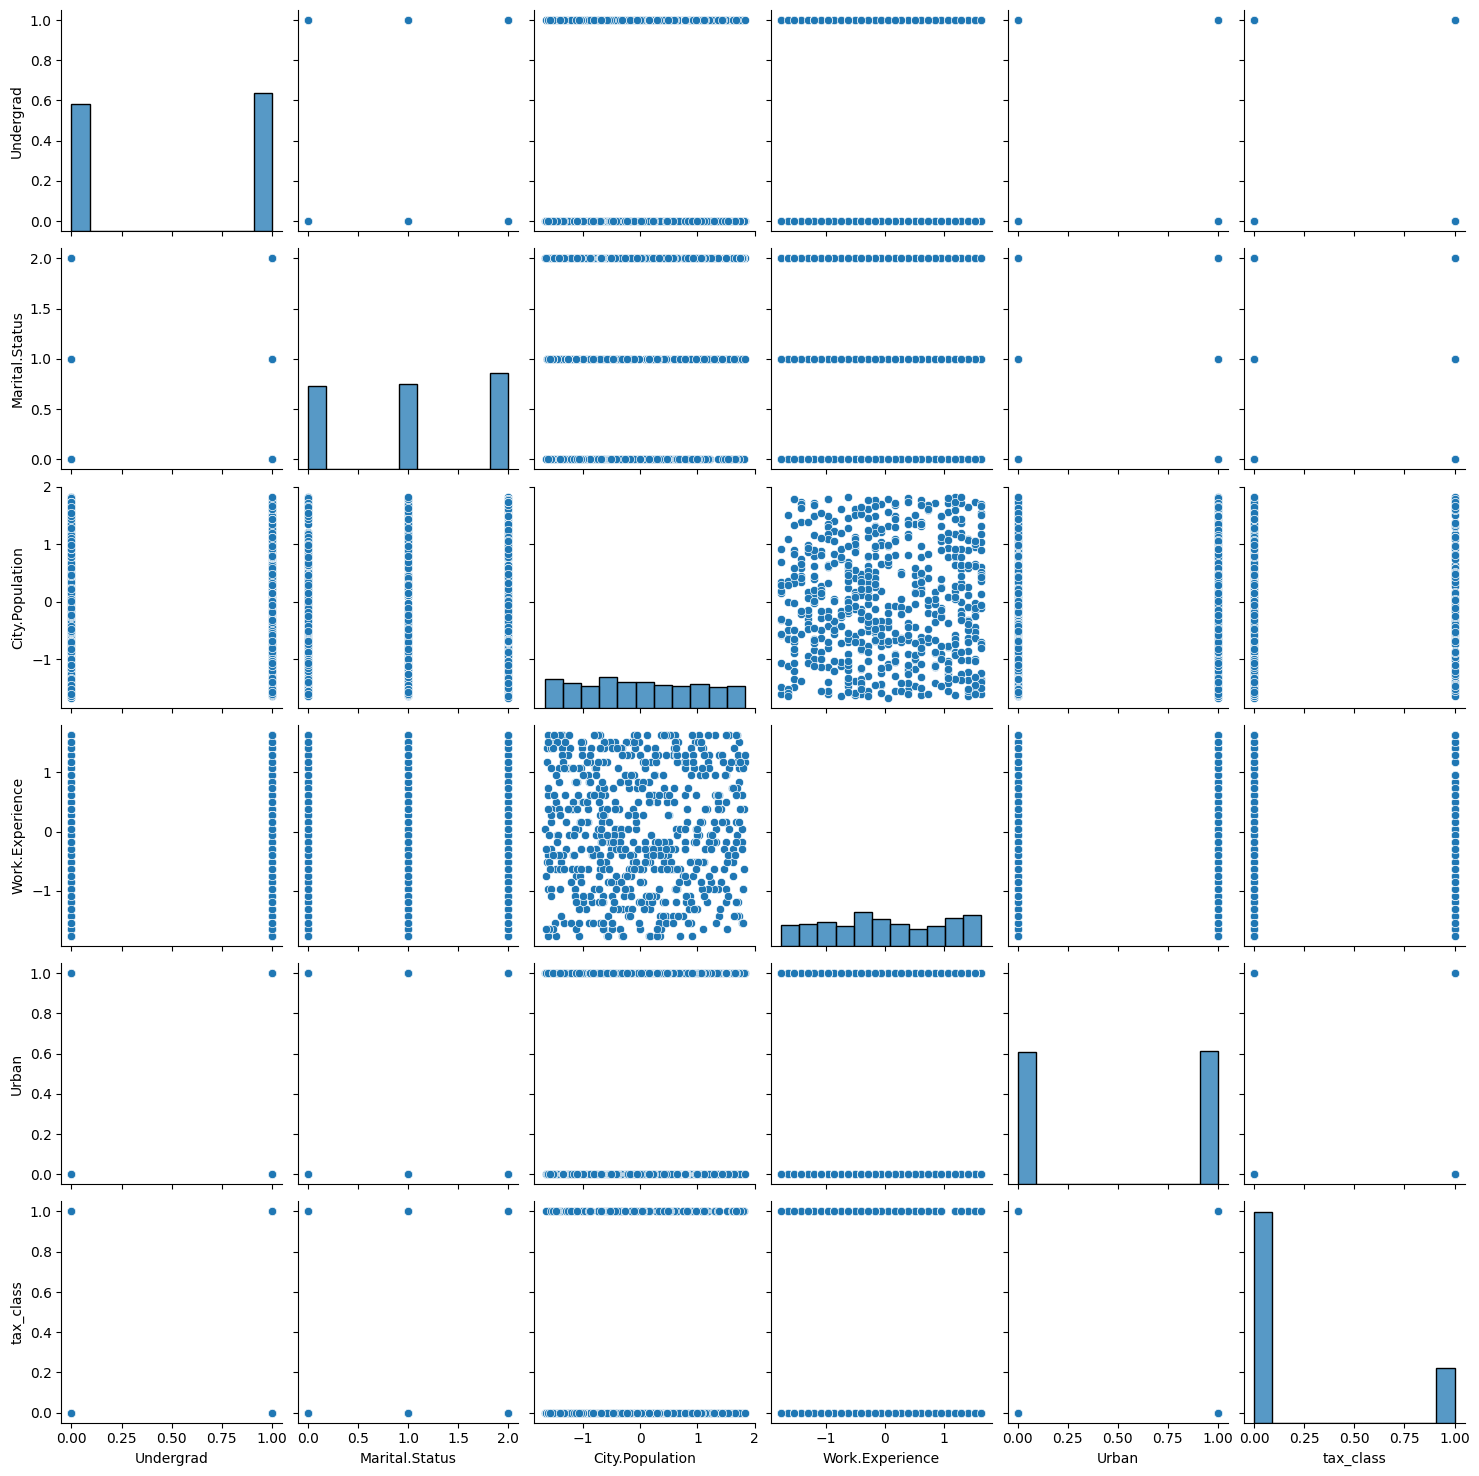

In [46]:
# Lets's plot pair to visualise the attributes all at once
sns.pairplot(data = data )

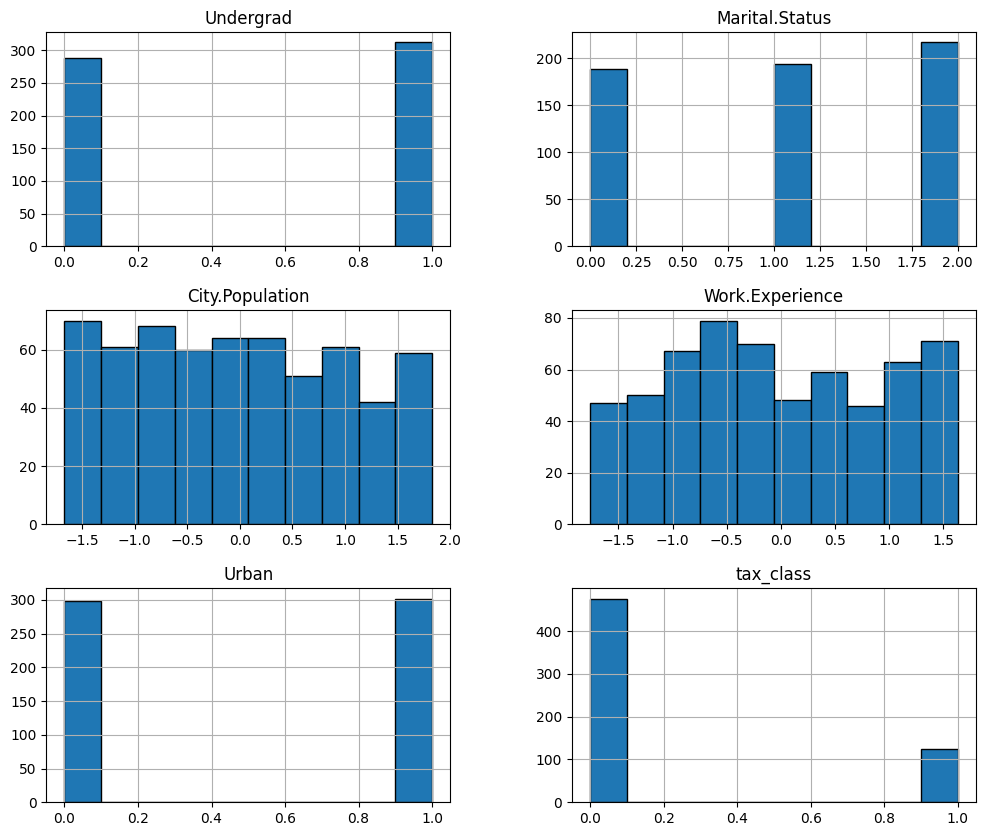

In [26]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black',figsize=(12, 10));

<ipython-input-47-8688d8d2b551>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["City.Population"])


<Axes: xlabel='City.Population', ylabel='Density'>

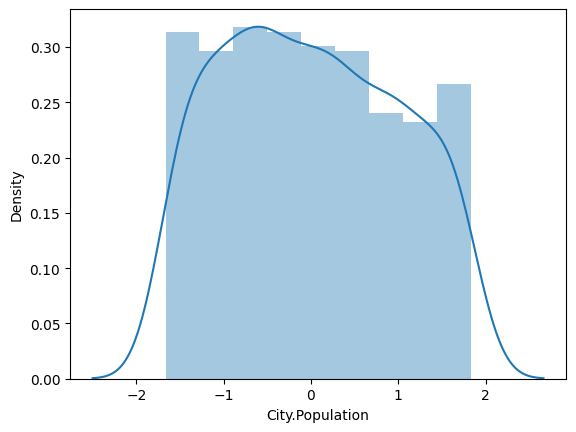

In [47]:
sns.distplot(data["City.Population"])

<ipython-input-48-bea6fe0d1ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Work.Experience"])


<Axes: xlabel='Work.Experience', ylabel='Density'>

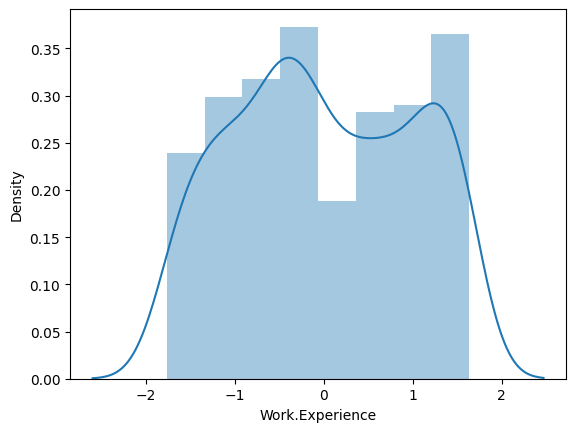

In [48]:
sns.distplot(data["Work.Experience"])

<Axes: >

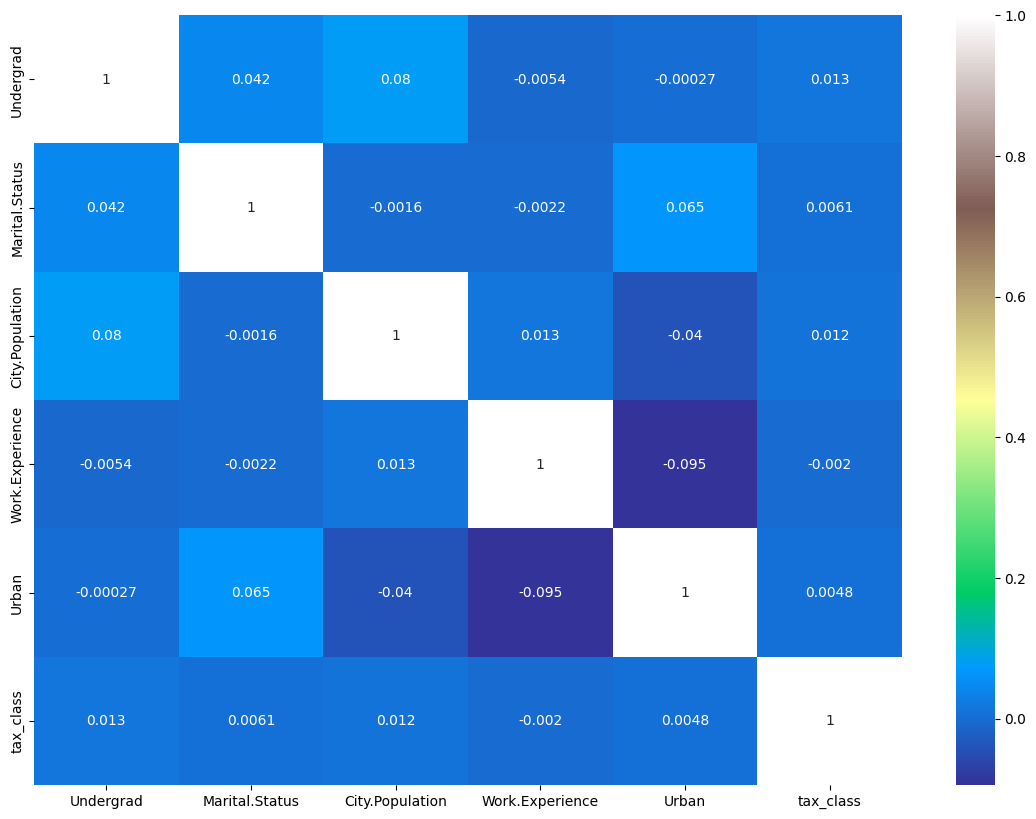

In [27]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='terrain')

In [30]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0


In [31]:
X=data.iloc[:,0:-1]
y=data['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

## Model Building using Random Forst

In [34]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier

In [35]:
modelb=RandomForestClassifier()
modelb.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.7666666666666667


## Using Grid Search optimisation

In [37]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(X,y)
pred=modelb.predict(X)
print(np.mean(y==pred))

0.795


In [39]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(X_train,y_train)
pred=modelb.predict(X_train)
print(np.mean(y_train==pred))

0.7979166666666667


## Applying K-fold cross Validation

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,X,y,cv=kfold)
print(results.mean())

0.7933333333333332


## Bagging

In [41]:
model1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=model1)
results=cross_val_score(model,X,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.7933333333333332


## Boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier(base_estimator=model)
results=cross_val_score(model,X,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.7933333333333332
